In [4]:
# This is  a practice to apply RL Q learning  

import numpy as np 
import matplotlib.pyplot as plt
EnvStaStrs ='''
..........
.        .
.        .
.     o  .
.        .
..........
'''

Alpha=0.9    # learning rate 
gamma =0.7   # impact on the successor states

In [5]:
def getMap():
    EnvStaSpace = [] 
    for line in EnvStaStrs.split('\n'):
        for c in line: 
            EnvStaSpace.append(c)  
    return EnvStaSpace
EnvStaSpaceUse= getMap()

In [2]:
class env(object): 
    
    def __init__(self):
        self.Ax=1
        self.Ay=1 
        self.length =10
        self.width = 6
        self.endGame = False 
        self.MoveAction= [[0,1],[1,0],[0,-1],[-1,0]] 
    #                    down  lef   up     sright    
        self.totalReward =0
    
    def present_state(self):
        return  self.length*self.Ay + self.Ax 
    
    def Get_State(self,x,y):
        return self.length*y+ x 
    def Interact(self, a):
        if not self.endGame: 
            tryX = self.Ax + self.MoveAction[a][0]
            tryY = self.Ay + self.MoveAction[a][1] 
            stateID = self.Get_State(tryX,tryY) 
            if EnvStaSpaceUse[stateID]=='.':
                reward = 0
            if EnvStaSpaceUse[stateID]=='o':
                reward = 100 
                self.updateloc(tryX,tryY)
                self.endGame = True
            if EnvStaSpaceUse[stateID] == ' ': 
                reward = 0 
                self.updateloc(tryX,tryY) 
            self.totalReward+=reward
        return reward 
        
    def printMap(self):
        stateID = self.Get_State(self.Ax,self.Ay)   
        strOut = ''
        EnvStaSpacePrint = getMap()
        EnvStaSpacePrint[stateID]='A'
        for i in range(self.width):
            line =''
            for j in range(self.length): 
                staId = i*self.length+ j 
                line+=EnvStaSpacePrint[staId]
            line+='\n'
            strOut+=line
        print(strOut)
    def updateloc(self,x,y):     
        self.Ax = x
        self.Ay = y

        

def epsilon_Greedy(Q, state,eps):
    epstemp = np.random.uniform(0,1)
    if epstemp>eps:
        a = np.random.randint(0,4)
    else: 
        a = np.argmax(Q[state,:])
    return a


def AgentPlay(Q,nEps,exploitingRate): 
    steplist_play=[]
    for i in range(nEps): 
        e= env()
        step=0
        while not e.endGame and step<50:
            a = epsilon_Greedy(Q,e.present_state(),exploitingRate)
            re = e.Interact(a)
            step+=1 
        steplist_play.append(step)
    return steplist_play   

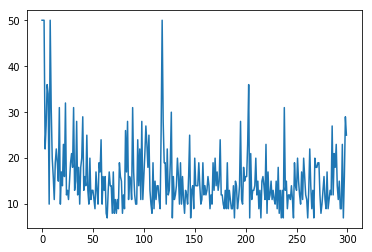

In [9]:
# value iteration algorithm
e = env()
Q = np.zeros([e.length*e.width,4])
exploitingRate =0.5 

stepsList = []
for i in range(300):
   # print('------------------- ',str(i),' episod')
    e=env()
    step=0
    while not e.endGame and step<50:
        state=e.Get_State(e.Ax,e.Ay)
        
        a=epsilon_Greedy(Q,state,exploitingRate)
        
        reward = e.Interact(a)
        
        newSta = e.Get_State(e.Ax,e.Ay)
        
        Q[state,a] = (1-Alpha)*Q[state,a]+Alpha*(reward + gamma*np.max(Q[newSta,:]))
        
        step+=1
     #   print(e.totalReward)
     #   e.printMap()
    stepsList.append(step)

plt.plot(stepsList)

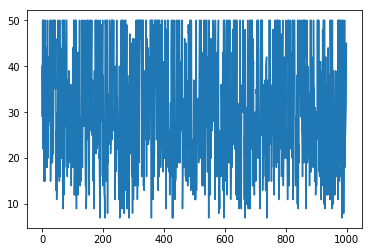

In [12]:
# let the agent play the game
# according to the Q table

plt.plot(AgentPlay(Q,1000,0.2))

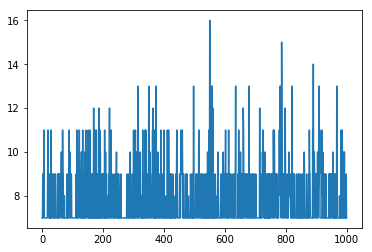

In [16]:
plt.plot(AgentPlay(Q,1000,0.9))

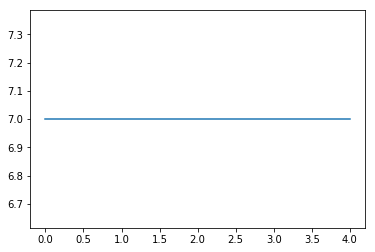

In [63]:
plt.plot(stepsListPlay)


In [83]:
# try SARSA algorithm 

SARSA_Step_List=[] 
QValueList = []
exploitRate = 0.5
e = env()

Q = np.zeros([e.length*e.width,4])
for i in range(1000): 
    e=env() 
    step=0
    state= e.present_state()
    a = epsilon_Greedy(Q,state,exploitRate)
    while not e.endGame and step<50:  
        reward = e.Interact(a)
        new_state = e.present_state()
        new_a = epsilon_Greedy(Q, new_state,exploitRate)
        Q[state,a] = (1-Alpha)*Q[state,a]+Alpha*(reward + gamma*Q[new_state, new_a])
        state = new_state
        a = new_a
        step+=1
      #  e.printMap()
    QValueList.append(sum(sum(Q)))
    SARSA_Step_List.append(step)
        

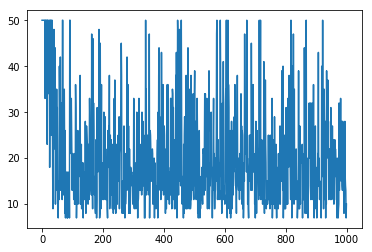

In [84]:
plt.plot(SARSA_Step_List)


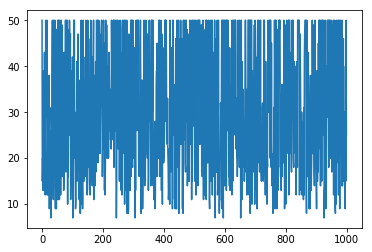

In [99]:
plt.plot(AgentPlay(Q,1000,0.2))  

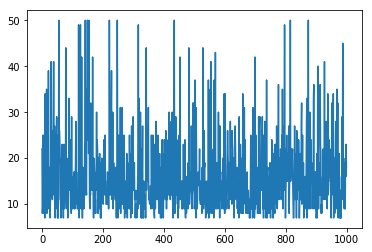

In [93]:
plt.plot(AgentPlay(Q,1000,0.5))  

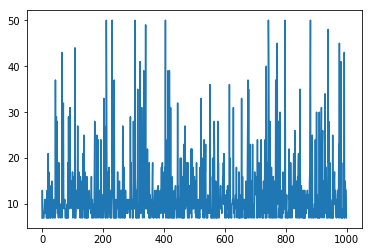

In [94]:
plt.plot(AgentPlay(Q,1000,0.7))    

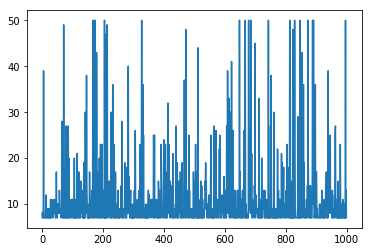

In [95]:
plt.plot(AgentPlay(Q,1000,0.8))   

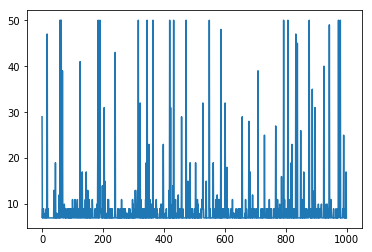

In [96]:
plt.plot(AgentPlay(Q,1000,0.9))   

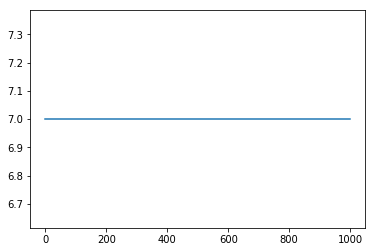

In [97]:
plt.plot(AgentPlay(Q,1000,1))   